<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB
name -> 714 unique values
name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
McCarthy, Mr. Timothy J                                1
Palsson, Master. Gosta Leonard                         1
Johnson, Mrs.

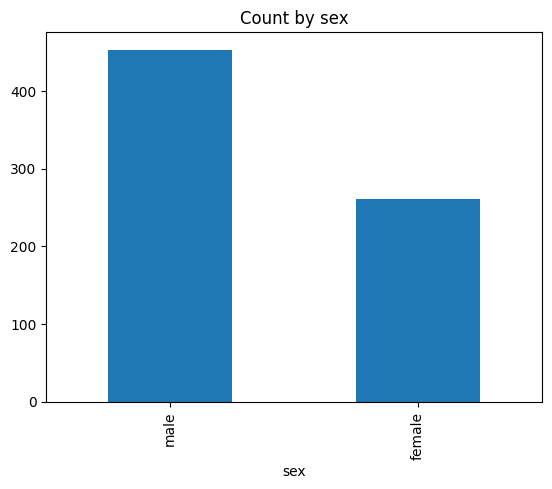

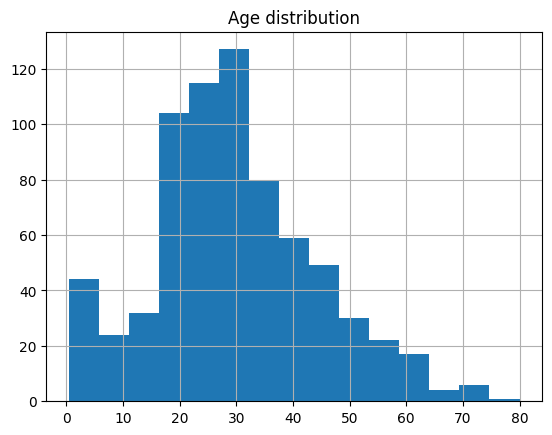

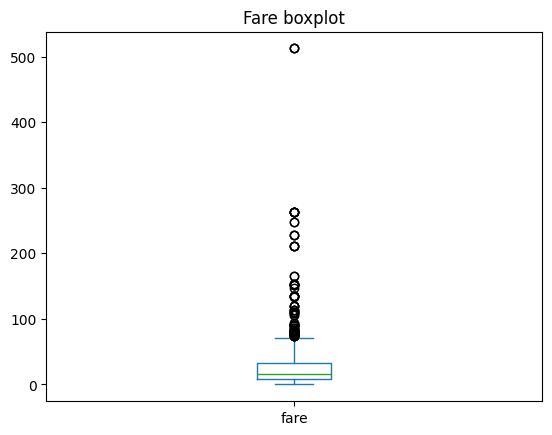

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.head()

df.info()        
df.describe()    
df.describe(include=['object'])  

df.isnull().sum()     
df.duplicated().sum() 

for col in df.select_dtypes(include='object').columns:
    print(col, "->", df[col].nunique(), "unique values")
    print(df[col].value_counts().head(10))
    print("----")

df['sex'].value_counts().plot(kind='bar')
plt.title("Count by sex")
plt.show()

df['age'].hist(bins=15)
plt.title("Age distribution")
plt.show()

df['fare'].plot(kind='box')
plt.title("Fare boxplot")
plt.show()

df_clean = df.copy()

for col in df_clean.select_dtypes(include=np.number).columns:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in df_clean.select_dtypes(include='object').columns:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

df_clean.isnull().sum()
df_clean.to_csv("calon_tni_cleaned.csv", index=False)

